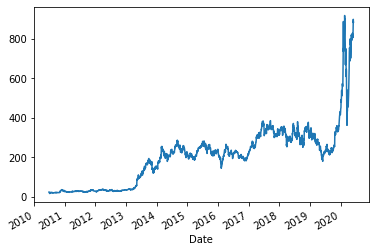

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

tesla = yf.Ticker("TSLA")
hist = tesla.history(period="max")
hist.Close.plot()

In [4]:
hist.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

In [5]:
hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29,19.00,25.00,17.54,23.89,18766300,0,0
2010-06-30,25.79,30.42,23.30,23.83,17187100,0,0
2010-07-01,25.00,25.92,20.27,21.96,8218800,0,0
2010-07-02,23.00,23.10,18.71,19.20,5139800,0,0
2010-07-06,20.00,20.00,15.83,16.11,6866900,0,0


In [29]:
data = yf.download("TSLA",interval = '5m',start = '2020-04-05')

[*********************100%***********************]  1 of 1 completed


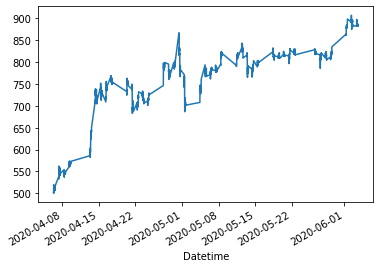

In [30]:
data.Close.plot()

Can these be combined?

In [31]:
result = pd.concat([hist,data])

In [34]:
result.head()

,index,Open,High,Low,Close,Volume,Dividends,Stock Splits,Adj Close
0,2010-06-29 00:00:00,19.00,25.00,17.54,23.89,18766300,0.0,0.0,NaN
1,2010-06-30 00:00:00,25.79,30.42,23.30,23.83,17187100,0.0,0.0,NaN
2,2010-07-01 00:00:00,25.00,25.92,20.27,21.96,8218800,0.0,0.0,NaN
3,2010-07-02 00:00:00,23.00,23.10,18.71,19.20,5139800,0.0,0.0,NaN
4,2010-07-06 00:00:00,20.00,20.00,15.83,16.11,6866900,0.0,0.0,NaN


In [33]:
result.reset_index(inplace=True)

AttributeError: 'NoneType' object has no attribute 'rename'

In [43]:
result = result.rename(columns = {'index':"DateTime"})

In [48]:
result.tail()

,DateTime,Open,High,Low,Close,Volume,Dividends,Stock Splits,Adj Close
5693,2020-06-03 15:35:00-04:00,884.719971,886.119873,884.000000,885.599976,59183,NaN,NaN,885.599976
5694,2020-06-03 15:40:00-04:00,885.570007,886.400024,884.599976,885.679993,77547,NaN,NaN,885.679993
5695,2020-06-03 15:45:00-04:00,885.710022,886.479919,885.109985,885.180115,80895,NaN,NaN,885.180115
5696,2020-06-03 15:50:00-04:00,885.710022,885.750000,882.448914,883.375000,106878,NaN,NaN,883.375000
5697,2020-06-03 15:55:00-04:00,883.349670,883.369995,880.275024,882.510010,216036,NaN,NaN,882.510010


In [49]:
result['DateTime'] = pd.to_datetime(result['DateTime'],utc=True)

In [51]:
result.tail()

,DateTime,Open,High,Low,Close,Volume,Dividends,Stock Splits,Adj Close
5693,2020-06-03 19:35:00+00:00,884.719971,886.119873,884.000000,885.599976,59183,NaN,NaN,885.599976
5694,2020-06-03 19:40:00+00:00,885.570007,886.400024,884.599976,885.679993,77547,NaN,NaN,885.679993
5695,2020-06-03 19:45:00+00:00,885.710022,886.479919,885.109985,885.180115,80895,NaN,NaN,885.180115
5696,2020-06-03 19:50:00+00:00,885.710022,885.750000,882.448914,883.375000,106878,NaN,NaN,883.375000
5697,2020-06-03 19:55:00+00:00,883.349670,883.369995,880.275024,882.510010,216036,NaN,NaN,882.510010


In [52]:
result.to_csv('../data/raw/tsla_stock_price.csv')